In [114]:
from matplotlib import pyplot as plt
import numpy as np
from sklearn.svm import SVR
import math

# Generate data

In [47]:
Nsamples = 250
X = np.random.uniform(-7,7,size=Nsamples)
sigma = 0.1
Y = np.sin(np.pi*X)/(np.pi*X) + sigma * np.random.randn(Nsamples)
True_X = np.linspace(-7,7)
True_function = np.sin(np.pi*True_X)/(np.pi*True_X)

# Plot a Graph of True function and Data Samples

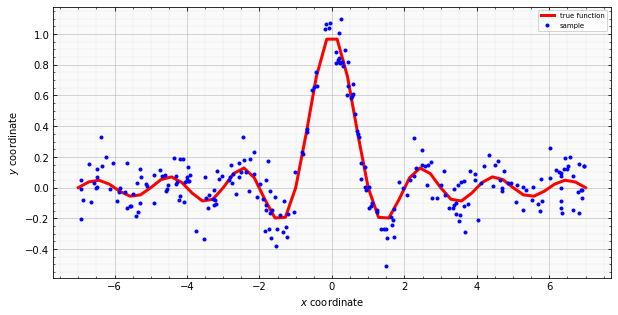

In [151]:
fid = plt.figure(figsize=(10,5))

Axes = plt.subplot(1,1,1)
Axes.axes.tick_params(which='both',direction='in',top=True, right=True)
plt.minorticks_on()
Axes.set_facecolor((0,0,0,0.02))
# draw the line
plt.plot(True_X, True_function, 'k-', linewidth=3, color = 'r', label='true function')
plt.plot(X, Y, 'bo', markersize = 3, label = 'sample')
plt.grid(True,which='major',linewidth=0.5)
plt.grid(True,which='minor',linewidth=0.1)
plt.xlabel("$x$ coordinate")
plt.ylabel("$y$ coordinate")
plt.legend(loc='upper right',fontsize='x-small')
plt.savefig('/Users/gexueren/Desktop/6254/Assignments/Final/Q1.jpg')

# Use sklearn.svm package to implement SVR

In [51]:
eps = 0.1
# set the model
Model = SVR(C=1e3, epsilon=eps, kernel="rbf", gamma=0.25)
Model.fit(X.reshape(-1,1),Y)
# prediction
y_predict = Model.predict(True_X.reshape(-1,1))

# Plot Prediction of Model

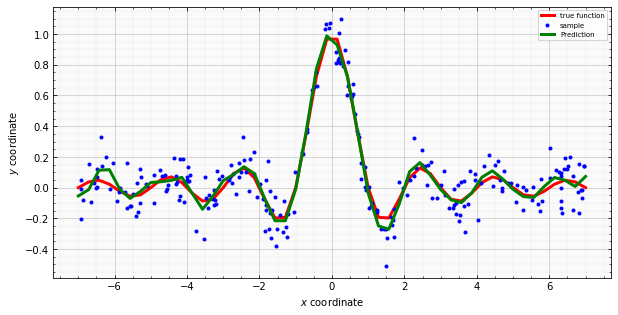

In [152]:
fid = plt.figure(figsize=(10,5))

Axes = plt.subplot(1,1,1)
Axes.axes.tick_params(which='both',direction='in',top=True, right=True)
plt.minorticks_on()
Axes.set_facecolor((0,0,0,0.02))
# draw the line
plt.plot(True_X, True_function, 'k-', linewidth=3, color = 'r', label='true function')
plt.plot(X, Y, 'bo', markersize = 3, label = 'sample')
plt.plot(True_X, y_predict, 'k-', linewidth=3, color = 'g', label='Prediction')

plt.grid(True,which='major',linewidth=0.5)
plt.grid(True,which='minor',linewidth=0.1)
plt.xlabel("$x$ coordinate")
plt.ylabel("$y$ coordinate")
plt.legend(loc='upper right',fontsize='x-small')
plt.savefig('/Users/gexueren/Desktop/6254/Assignments/Final/Q2.jpg')

# Plot Trend of Multiplier

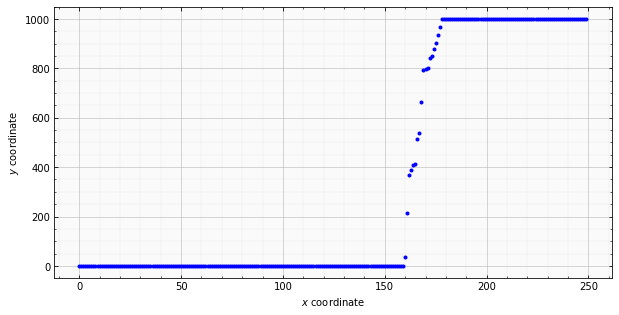

In [153]:
multiplier = abs(Model.dual_coef_) # get the multiplier
sort_multiplier = sorted(multiplier.ravel()) # sort it

fid = plt.figure(figsize=(10,5))
Axes = plt.subplot(1,1,1)
Axes.axes.tick_params(which='both',direction='in',top=True, right=True)
plt.minorticks_on()
Axes.set_facecolor((0,0,0,0.02))
# draw the line
xcoord = np.arange(250-multiplier.shape[1])
ycoord = [0] * len(xcoord)
mulx = 160 + np.arange(multiplier.shape[1])

plt.plot(xcoord, ycoord, 'bo', markersize = 3)
plt.plot(mulx, sort_multiplier, 'bo', markersize = 3)
plt.grid(True,which='major',linewidth=0.5)
plt.grid(True,which='minor',linewidth=0.1)
plt.xlabel("$x$ coordinate")
plt.ylabel("$y$ coordinate")
plt.savefig('/Users/gexueren/Desktop/6254/Assignments/Final/Q3.jpg')

# SVR Model using rbf kernel

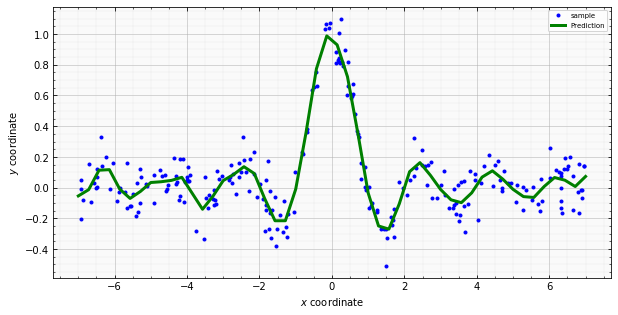

In [159]:
# define the 'rbf' kernel
def rbf_kernel(x_i, x_j):
    gamma = 0.5
    sum_ = (x_i - x_j)**2
    k = math.exp(-sum_/(2 * gamma**2))
    return k

# penalty
C = 100
# define the matrix
M = np.ones([251,251])
for i in range(1,251):
    for j in range(1,251):
        if i == j:
            M[i][j] = rbf_kernel(X[i-1], X[j-1]) + 1/C
        else:
            M[i][j] = rbf_kernel(X[i-1], X[j-1])            
M[0][0] = 0

y = [0] + Y.tolist()
inv_M = np.linalg.inv(M)
res = inv_M.dot(y)
# calculation get b and alpha
b = res[0]
alpha = res[1:]

# do prediction
test = np.linspace(-7,7)
y_predict = []
for test_i in test:
    sum_ = 0
    for i in range(len(X)):
        sum_ += alpha[i] * rbf_kernel(X[i], test_i)
    y_predict.append(sum_ + b)

# plot
fid = plt.figure(figsize=(10,5))
Axes = plt.subplot(1,1,1)
Axes.axes.tick_params(which='both',direction='in',top=True, right=True)
plt.minorticks_on()
Axes.set_facecolor((0,0,0,0.02))
xcoord = np.arange(250-multiplier.shape[1])
ycoord = [0] * len(xcoord)
mulx = 160 + np.arange(multiplier.shape[1])

plt.plot(X, Y, 'bo', markersize = 3, label = 'sample')
plt.plot(test, y_predict, 'k-', linewidth=3, color = 'g', label='Prediction')

plt.grid(True,which='major',linewidth=0.5)
plt.grid(True,which='minor',linewidth=0.1)
plt.xlabel("$x$ coordinate")
plt.ylabel("$y$ coordinate")
plt.legend(loc='upper right',fontsize='x-small')
plt.savefig('/Users/gexueren/Desktop/6254/Assignments/Final/Q4.jpg')

# Plot trend of Multiplier

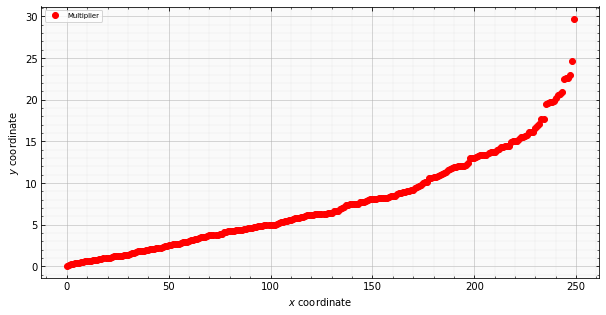

In [160]:
sort_alpha = sorted(abs(alpha))

fid = plt.figure(figsize=(10,5))
Axes = plt.subplot(1,1,1)
Axes.axes.tick_params(which='both',direction='in',top=True, right=True)
plt.minorticks_on()
Axes.set_facecolor((0,0,0,0.02))
# draw the line
xcoord = np.arange(250-multiplier.shape[1])
ycoord = [0] * len(xcoord)
mulx = 160 + np.arange(multiplier.shape[1])

plt.plot(sort_alpha, 'ro', linewidth=3, color = 'r', label='Multiplier')

plt.grid(True,which='major',linewidth=0.5)
plt.grid(True,which='minor',linewidth=0.1)
plt.xlabel("$x$ coordinate")
plt.ylabel("$y$ coordinate")
plt.legend(loc='upper left',fontsize='x-small')
plt.savefig('/Users/gexueren/Desktop/6254/Assignments/Final/Q5.jpg')